# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

api_key = "e0b2fa9b37da736bf33d2a53a7476f8d"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Starting URL for Weather Map API Call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_key}&q="

cities_data_pd = pd.DataFrame({"City": cities})
cities_data_pd["Cloudiness"] = ""
cities_data_pd["Country"] = ""
cities_data_pd["Date"] = ""
cities_data_pd["Humidity"] = ""
cities_data_pd["Lat"] = ""
cities_data_pd["Lng"] = ""
cities_data_pd["Max Temp"] = ""
cities_data_pd["Wind Speed"] = ""

for index, row in cities_data_pd.iterrows():
    city = row["City"]
    response = requests.get(url + city).json()
    
    try:
        print(f"Processing Record {index + 1} of {len(cities)} | {city}")
        print(url + city)
        
        cities_data_pd.loc[index, "Cloudiness"] = response["clouds"]["all"]
        cities_data_pd.loc[index, "Country"] = response["sys"]["country"]
        cities_data_pd.loc[index, "Date"] = response["dt"]
        cities_data_pd.loc[index, "Humidity"] = response["main"]["humidity"]
        cities_data_pd.loc[index, "Lat"] = response["coord"]["lat"]
        cities_data_pd.loc[index, "Lng"] = response["coord"]["lon"]
        cities_data_pd.loc[index, "Max Temp"] = response["main"]["temp_max"]
        cities_data_pd.loc[index, "Wind Speed"] = response["wind"]["speed"]
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")

Processing Record 1 of 629 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=hithadhoo
Processing Record 1 of 629 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=hithadhoo
Processing Record 2 of 629 | lodja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=lodja
Processing Record 2 of 629 | lodja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=lodja
Processing Record 3 of 629 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=bluff
Processing Record 3 of 629 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=bluff
Processing Record 4 of 629 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736

Processing Record 28 of 629 | lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=lagoa
Processing Record 28 of 629 | lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=lagoa
Processing Record 29 of 629 | kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=kodiak
Processing Record 29 of 629 | kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=kodiak
Processing Record 30 of 629 | hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=hasaki
Processing Record 30 of 629 | hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=hasaki
Processing Record 31 of 629 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736b

Processing Record 55 of 629 | grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=grindavik
Processing Record 55 of 629 | grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=grindavik
Processing Record 56 of 629 | yar-sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=yar-sale
Processing Record 56 of 629 | yar-sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=yar-sale
Processing Record 57 of 629 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=bredasdorp
Processing Record 57 of 629 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=bredasdorp
Processing Record 58 of 629 | samusu
http://api.openweathermap.org/data/2.5/weathe

Processing Record 81 of 629 | turukhansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=turukhansk
Processing Record 82 of 629 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=cabo san lucas
Processing Record 82 of 629 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=cabo san lucas
Processing Record 83 of 629 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=butaritari
Processing Record 83 of 629 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=butaritari
Processing Record 84 of 629 | vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=vaitupu
City not found. Skipping...
Processing Record 84 of 629 | va

Processing Record 108 of 629 | razole
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=razole
Processing Record 108 of 629 | razole
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=razole
Processing Record 109 of 629 | kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=kahului
Processing Record 109 of 629 | kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=kahului
Processing Record 110 of 629 | kalach-na-donu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=kalach-na-donu
Processing Record 110 of 629 | kalach-na-donu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=kalach-na-donu
Processing Record 111 of 629 | luderitz
http://api.openweathermap.org/data/2

Processing Record 135 of 629 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=yellowknife
Processing Record 135 of 629 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=yellowknife
Processing Record 136 of 629 | hualmay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=hualmay
Processing Record 136 of 629 | hualmay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=hualmay
Processing Record 137 of 629 | santa cruz de rosales
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=santa cruz de rosales
City not found. Skipping...
Processing Record 137 of 629 | santa cruz de rosales
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=santa cruz de rosales


Processing Record 161 of 629 | terney
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=terney
Processing Record 161 of 629 | terney
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=terney
Processing Record 162 of 629 | saint-pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=saint-pierre
Processing Record 162 of 629 | saint-pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=saint-pierre
Processing Record 163 of 629 | cairns
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=cairns
Processing Record 163 of 629 | cairns
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=cairns
Processing Record 164 of 629 | fasa
http://api.openweathermap.org/data/2.5/weather?units

Processing Record 187 of 629 | nouadhibou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=nouadhibou
Processing Record 188 of 629 | cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=cidreira
Processing Record 188 of 629 | cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=cidreira
Processing Record 189 of 629 | ipixuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=ipixuna
Processing Record 189 of 629 | ipixuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=ipixuna
Processing Record 190 of 629 | wangou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=wangou
Processing Record 190 of 629 | wangou
http://api.openweathermap.org/data/2.5/weather?units=I

Processing Record 214 of 629 | pulandian
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=pulandian
Processing Record 214 of 629 | pulandian
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=pulandian
Processing Record 215 of 629 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=nikolskoye
Processing Record 215 of 629 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=nikolskoye
Processing Record 216 of 629 | anchorage
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=anchorage
Processing Record 216 of 629 | anchorage
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=anchorage
Processing Record 217 of 629 | okhotsk
http://api.openweathermap.org/dat

Processing Record 241 of 629 | arona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=arona
Processing Record 241 of 629 | arona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=arona
Processing Record 242 of 629 | yining
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=yining
Processing Record 242 of 629 | yining
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=yining
Processing Record 243 of 629 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=geraldton
Processing Record 243 of 629 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=geraldton
Processing Record 244 of 629 | komsomolets
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Processing Record 267 of 629 | ponta delgada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=ponta delgada
Processing Record 268 of 629 | oranjemund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=oranjemund
Processing Record 268 of 629 | oranjemund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=oranjemund
Processing Record 269 of 629 | balugaon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=balugaon
Processing Record 269 of 629 | balugaon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=balugaon
Processing Record 270 of 629 | harnosand
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=harnosand
Processing Record 270 of 629 | harnosand
http://api.openweathermap.o

Processing Record 294 of 629 | darhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=darhan
Processing Record 295 of 629 | karaul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=karaul
City not found. Skipping...
Processing Record 295 of 629 | karaul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=karaul
City not found. Skipping...
Processing Record 296 of 629 | pesochnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=pesochnoye
Processing Record 296 of 629 | pesochnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=pesochnoye
Processing Record 297 of 629 | mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=mahebourg
Processing Record 297 of 629 | mah

Processing Record 321 of 629 | daru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=daru
Processing Record 321 of 629 | daru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=daru
Processing Record 322 of 629 | assiniboia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=assiniboia
Processing Record 322 of 629 | assiniboia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=assiniboia
Processing Record 323 of 629 | wawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=wawa
Processing Record 323 of 629 | wawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=wawa
Processing Record 324 of 629 | itarema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2f

Processing Record 347 of 629 | peterhead
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=peterhead
Processing Record 348 of 629 | meru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=meru
Processing Record 348 of 629 | meru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=meru
Processing Record 349 of 629 | ugoofaaru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=ugoofaaru
Processing Record 349 of 629 | ugoofaaru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=ugoofaaru
Processing Record 350 of 629 | caravelas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=caravelas
Processing Record 350 of 629 | caravelas
http://api.openweathermap.org/data/2.5/weather?units=Im

Processing Record 374 of 629 | guangyuan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=guangyuan
Processing Record 374 of 629 | guangyuan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=guangyuan
Processing Record 375 of 629 | hovd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=hovd
Processing Record 375 of 629 | hovd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=hovd
Processing Record 376 of 629 | breves
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=breves
Processing Record 376 of 629 | breves
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=breves
Processing Record 377 of 629 | ganzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e

Processing Record 401 of 629 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=los llanos de aridane
Processing Record 401 of 629 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=los llanos de aridane
Processing Record 402 of 629 | paratinga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=paratinga
Processing Record 402 of 629 | paratinga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=paratinga
Processing Record 403 of 629 | fort nelson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=fort nelson
Processing Record 403 of 629 | fort nelson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=fort nelson
Processing Record 40

Processing Record 427 of 629 | xai-xai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=xai-xai
Processing Record 428 of 629 | sun prairie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=sun prairie
Processing Record 428 of 629 | sun prairie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=sun prairie
Processing Record 429 of 629 | pangoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=pangoa
Processing Record 429 of 629 | pangoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=pangoa
Processing Record 430 of 629 | provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=provideniya
Processing Record 430 of 629 | provideniya
http://api.openweathermap.org/data/2.

Processing Record 454 of 629 | bestobe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=bestobe
Processing Record 455 of 629 | bay roberts
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=bay roberts
Processing Record 455 of 629 | bay roberts
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=bay roberts
Processing Record 456 of 629 | marshall
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=marshall
Processing Record 456 of 629 | marshall
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=marshall
Processing Record 457 of 629 | xichang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=xichang
Processing Record 457 of 629 | xichang
http://api.openweathermap.org/data/2.5/we

Processing Record 481 of 629 | qaqortoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=qaqortoq
Processing Record 481 of 629 | qaqortoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=qaqortoq
Processing Record 482 of 629 | lashio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=lashio
Processing Record 482 of 629 | lashio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=lashio
Processing Record 483 of 629 | neuquen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=neuquen
Processing Record 483 of 629 | neuquen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=neuquen
Processing Record 484 of 629 | wenzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Processing Record 507 of 629 | den helder
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=den helder
Processing Record 508 of 629 | kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=kavieng
Processing Record 508 of 629 | kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=kavieng
Processing Record 509 of 629 | huarmey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=huarmey
Processing Record 509 of 629 | huarmey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=huarmey
Processing Record 510 of 629 | vila
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=vila
Processing Record 510 of 629 | vila
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

Processing Record 534 of 629 | nichinan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=nichinan
Processing Record 534 of 629 | nichinan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=nichinan
Processing Record 535 of 629 | auki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=auki
Processing Record 535 of 629 | auki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=auki
Processing Record 536 of 629 | devanhalli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=devanhalli
Processing Record 536 of 629 | devanhalli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=devanhalli
Processing Record 537 of 629 | talcahuano
http://api.openweathermap.org/data/2.5/weather?units=I

Processing Record 560 of 629 | belmonte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=belmonte
Processing Record 561 of 629 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=komsomolskiy
Processing Record 561 of 629 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=komsomolskiy
Processing Record 562 of 629 | adre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=adre
Processing Record 562 of 629 | adre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=adre
Processing Record 563 of 629 | rawson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=rawson
Processing Record 563 of 629 | rawson
http://api.openweathermap.org/data/2.5/weather?units=I

Processing Record 587 of 629 | amot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=amot
Processing Record 588 of 629 | taburi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=taburi
City not found. Skipping...
Processing Record 588 of 629 | taburi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=taburi
City not found. Skipping...
Processing Record 589 of 629 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=saint-augustin
Processing Record 589 of 629 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=saint-augustin
Processing Record 590 of 629 | port hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=port hardy
Processing Record 59

Processing Record 614 of 629 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=kruisfontein
Processing Record 614 of 629 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=kruisfontein
Processing Record 615 of 629 | livingstonia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=livingstonia
Processing Record 615 of 629 | livingstonia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=livingstonia
Processing Record 616 of 629 | port hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=port hedland
Processing Record 616 of 629 | port hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0b2fa9b37da736bf33d2a53a7476f8d&q=port hedland
Processing Record 617 of 629 | praxedis 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Drop cities not found
cities_data_pd = cities_data_pd[cities_data_pd["Country"] != ""]
cities_data_pd.count()

City          582
Cloudiness    582
Country       582
Date          582
Humidity      582
Lat           582
Lng           582
Max Temp      582
Wind Speed    582
dtype: int64

City          582
Cloudiness    582
Country       582
Date          582
Humidity      582
Lat           582
Lng           582
Max Temp      582
Wind Speed    582
dtype: int64

In [8]:
# Output File (CSV)
cities_data_pd.to_csv("cities.csv")

#Display the City Data Frame
cities_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hithadhoo,26,MV,1604802743,70,-0.6,73.08,84.16,7.34
1,lodja,76,CD,1604803173,96,-3.48,23.43,66.6,0.67
2,bluff,29,NZ,1604803173,55,-46.6,168.33,55,10
3,rikitea,100,PF,1604803174,75,-23.12,-134.97,71.65,19.53
4,lavumisa,0,SZ,1604803175,83,-27.31,31.89,73.92,3.29


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hithadhoo,26,MV,1604802743,70,-0.6,73.08,84.16,7.34
1,lodja,76,CD,1604803173,96,-3.48,23.43,66.6,0.67
2,bluff,29,NZ,1604803173,55,-46.6,168.33,55,10
3,rikitea,100,PF,1604803174,75,-23.12,-134.97,71.65,19.53
4,lavumisa,0,SZ,1604803175,83,-27.31,31.89,73.92,3.29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

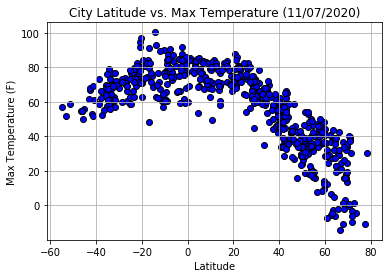

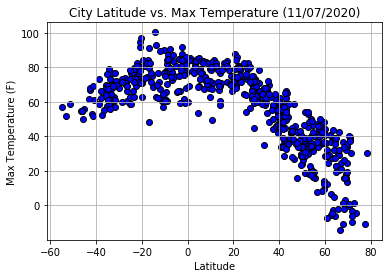

In [9]:
plt.scatter(cities_data_pd["Lat"], cities_data_pd["Max Temp"], marker="o", facecolor="blue", edgecolor="black")
date = time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("LatTemp.png")

#### Latitude vs. Humidity Plot

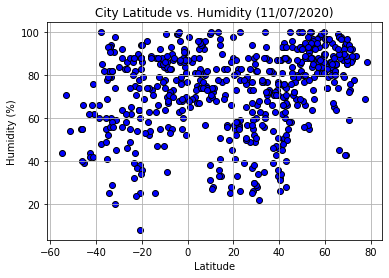

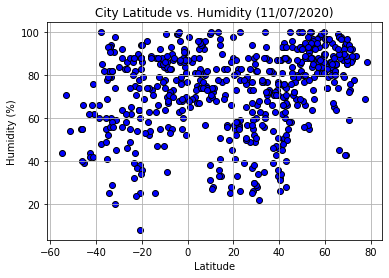

In [10]:
plt.scatter(cities_data_pd["Lat"], cities_data_pd["Humidity"], marker="o", facecolor="blue", edgecolor="black")
date = time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("LatHumidity.png")

#### Latitude vs. Cloudiness Plot

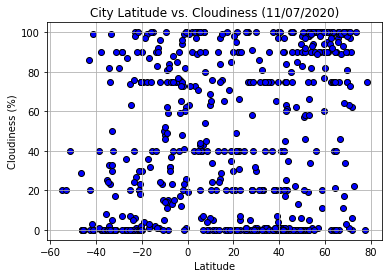

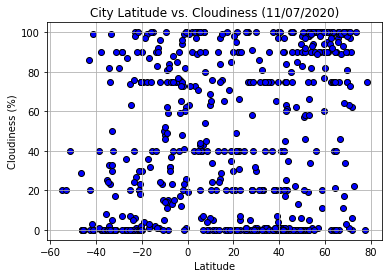

In [11]:
plt.scatter(cities_data_pd["Lat"], cities_data_pd["Cloudiness"], marker="o", facecolor="blue", edgecolor="black")
date = time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("LatCloudiness.png")

#### Latitude vs. Wind Speed Plot

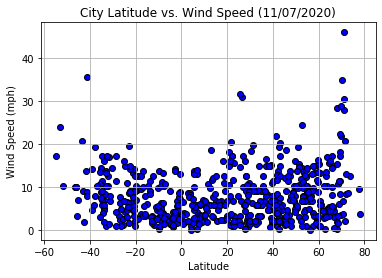

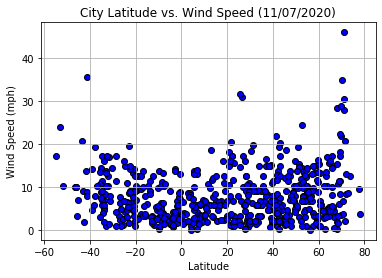

In [13]:
plt.scatter(cities_data_pd["Lat"], cities_data_pd["Wind Speed"], marker="o", facecolor="blue", edgecolor="black")
date = time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("LatWindSpeed.png")